### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Almost all the columns are complete. 'Car' is the biggest issue, with only 108 non-null entries. 'Bar', 'CoffeeHouse', 'Carryaway', 'RestaurantLessThan20' and 'Restaurant20to50' also have a couple of missing entries, but those can probably be filled with average/mode values (or just drop the rows where they're null).

In [14]:
# What does the car column look like, where it's not null?
data[~data['car'].isnull()]['car'].unique()

array(['Scooter and motorcycle', 'crossover', 'Mazda5', 'do not drive',
       'Car that is too old to install Onstar :D'], dtype=object)

It doesn't look like there's much standardization on what goes into this column anyway. I think it won't be the end of the world if we just drop it.

Next, lets look at the contents of the other incomplete columns to see how best we can fill them.

In [16]:
data['CoffeeHouse'].unique(), data['CarryAway'].unique()

(array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object),
 array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object))

I'm a little apprehensive about filling these with the most common value, because I wonder if that could leave us with rows that have conflicting information (that could mess with the analysis). Lets see how many rows we'd stand to lose if we dropped all of the rows that have null values.

In [19]:
no_nulls_df = data.drop(['car'], axis=1).dropna()
no_nulls_df.shape

(12079, 25)

Since we would only lose 605 rows in total (under 5% of the total dataset), I think it might be reasonable to go ahead and drop these rows.

3. Decide what to do about your missing data -- drop, replace, other...

In [20]:
# Drop the 'car' column altogether
data_cleaned = data.drop(['car'], axis=1).dropna()
data_cleaned.shape

(12079, 25)

4. What proportion of the total observations chose to accept the coupon?



In [94]:
sum(data_cleaned[data_cleaned['Y']==1]['Y']) / len(data_cleaned['Y'])

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

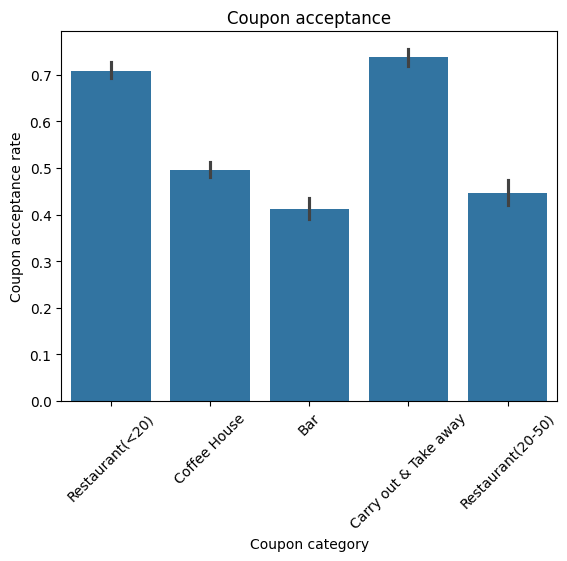

In [91]:
ax = sns.barplot(data=data_cleaned, x='coupon', y='Y')
ax.set_title("Coupon acceptance")
ax.set_ylabel("Coupon acceptance rate")
ax.set_xlabel("Coupon category")
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

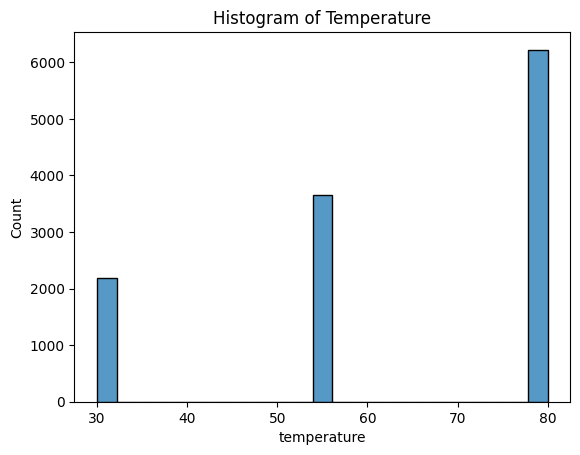

In [146]:
ax = sns.histplot(data=data_cleaned, x='temperature')
ax.set_title("Histogram of Temperature")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [31]:
bar = data_cleaned[data_cleaned['coupon']=='Bar']
bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [33]:
sum(bar['Y']) / len(bar['Y'])

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [54]:
# Define a function to calculate acceptance rate, for convenience
def acc_rate(df):
  return sum(df['Y']) / len(df['Y'])

In [57]:
bar_3_or_fewer = bar.query("Bar in ['never', 'less1', '1~3']")
bar_over_3 = bar.query("Bar in ['gt8', '4~8']")

# Compute acceptance rate for each of the two groups
acceptance_3_or_fewer = acc_rate(bar_3_or_fewer)
acceptance_over_3 = acc_rate(bar_over_3)
acceptance_3_or_fewer, acceptance_over_3

(0.37267441860465117, 0.7616580310880829)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [58]:
bar_over_25_once_month = bar.query("Bar not in ['never', 'less1'] and age not in ['below21', '21']")
bar_rest = bar.query("not (Bar not in ['never', 'less1'] and age not in ['below21', '21'])")

# Compute acceptance rate for each of the two groups
acceptance_over_25_once_month = acc_rate(bar_over_25_once_month)
acceptance_rest = acc_rate(bar_rest)
acceptance_over_25_once_month, acceptance_rest

(0.6898263027295285, 0.33774834437086093)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [61]:
bars_over_once_month = bar.query("Bar not in ['never', 'less1']")
bars_passenger_not_kid = bar.query("passanger != 'kid'")
bars_occupation_not_fff = bar.query("occupation != 'Farming Fishing & Forestry'")

# Compute acceptance rates
acceptance_over_once_month = acc_rate(bars_over_once_month)
acceptance_passenger_not_kid = acc_rate(bars_passenger_not_kid)
acceptance_occupation_not_fff = acc_rate(bars_occupation_not_fff)

acceptance_over_once_month, acceptance_passenger_not_kid, acceptance_occupation_not_fff

(0.6853146853146853, 0.41191845269210664, 0.4117647058823529)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [66]:
# Variable names are getting long. Lets call these groups 1, 2 and 3 (in order listed in the prompt above)

bars_grp1 = bar.query("Bar not in ['never', 'less1']").query("passanger != 'kid'").query("maritalStatus != 'Widowed'")
bars_grp2 = bar.query("Bar not in ['never', 'less1']").query("age in ['below21', '21', '26']")
bars_grp3 = bar.query("RestaurantLessThan20 in ['4~8', 'gt8']").query("income in ['Less than $12500', '$25000 - $37499', '$37500 - $49999', '$12500 - $24999']")

# Compute acceptance rates
acceptance_grp1 = acc_rate(bars_grp1)
acceptance_grp2 = acc_rate(bars_grp2)
acceptance_grp3 = acc_rate(bars_grp3)

acceptance_grp1, acceptance_grp2, acceptance_grp3

(0.6853146853146853, 0.7195121951219512, 0.45645645645645644)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

* Drivers who go to bars more than once a month are more likely to accept the bar coupon than other drivers. Drivers who go to bars 3+ times/month are even more likely to accept a bar coupon.
* Other attributes like occupation, marital status, presence of a child in the car, etc are less useful in predicting whether a driver will accept a bar coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I will now explore the characteristics of drivers who accept carry-out and takeaway coupons, with the goal of determining what factors make a driver more likely to accept a takeout coupon.

In [72]:
# Creating a new df containing only takeout/carryout coupons
takeout = data_cleaned[data_cleaned['coupon'] == 'Carry out & Take away']
len(takeout)

2280

To establish a baseline, lets see what % of customers who received a takeout coupon accepted it.

In [134]:
sum(takeout['Y']) / len(takeout['Y'])

0.737719298245614

How much difference does it make if the restaurant is in the same vs opposite direction from the driver?

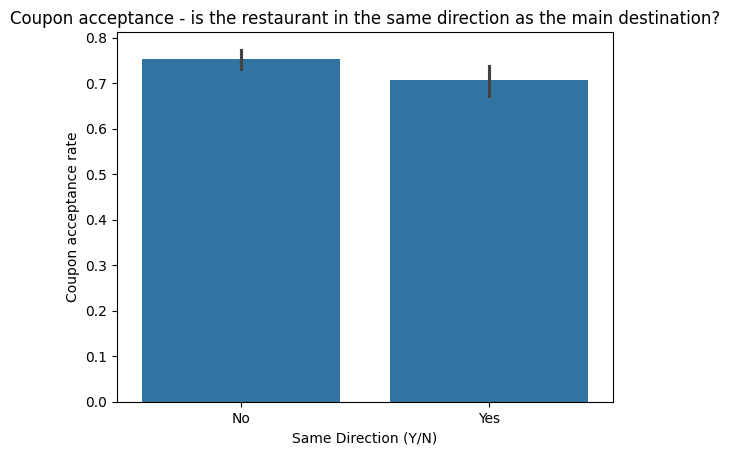

In [163]:
# Make copy of "direction_same" column written out as "Yes"/"No", to make the plot more readable
takeout['direction_same_copy'] = np.where(takeout['direction_same'] == 0, "No", "Yes")

# Same direction
fig = sns.barplot( data=takeout, x='direction_same_copy', y="Y")
fig.set_title("Coupon acceptance - is the restaurant in the same direction as the main destination?")
fig.set_xlabel("Same Direction (Y/N)")
fig.set_ylabel("Coupon acceptance rate")

plt.show()

In [152]:
# Let's get some specific numbers on the relative percentages
acc_rate(takeout[takeout['direction_same']==0]), acc_rate(takeout[takeout['direction_same']==1])

(0.7536136662286466, 0.7058047493403694)

It looks like the direction does not make a significant difference. In fact, it even seems that drivers are slightly more likely to accept a coupon that's in the opposite direction from their destination...? In any event, it doesn't seem like direction makes a big difference, so let's explore some other features instead.

Next, I want to explore the destination column, to see if that has an impact on whether people accept a takeout coupon. For instance, I wonder if drivers who are heading home are more likely to accept a takeout coupon than other drivers.

In [112]:
# Add a categorical version of the "Y" column to make some visualizations easier to read
takeout['Y_cat'] = np.where(takeout['Y']==0, "No", "Yes")

In [113]:
# Split the dataset into these three groups for further analysis
dest_home = takeout[takeout['destination'] == 'Home']
dest_work = takeout[takeout['destination'] == 'Work']
dest_none = takeout[takeout['destination'] == 'No Urgent Place']

# What proportions do each of these groups make up?
len(dest_home) / len(takeout), len(dest_work) / len(takeout), len(dest_none) / len(takeout)

(0.2719298245614035, 0.31973684210526315, 0.4083333333333333)

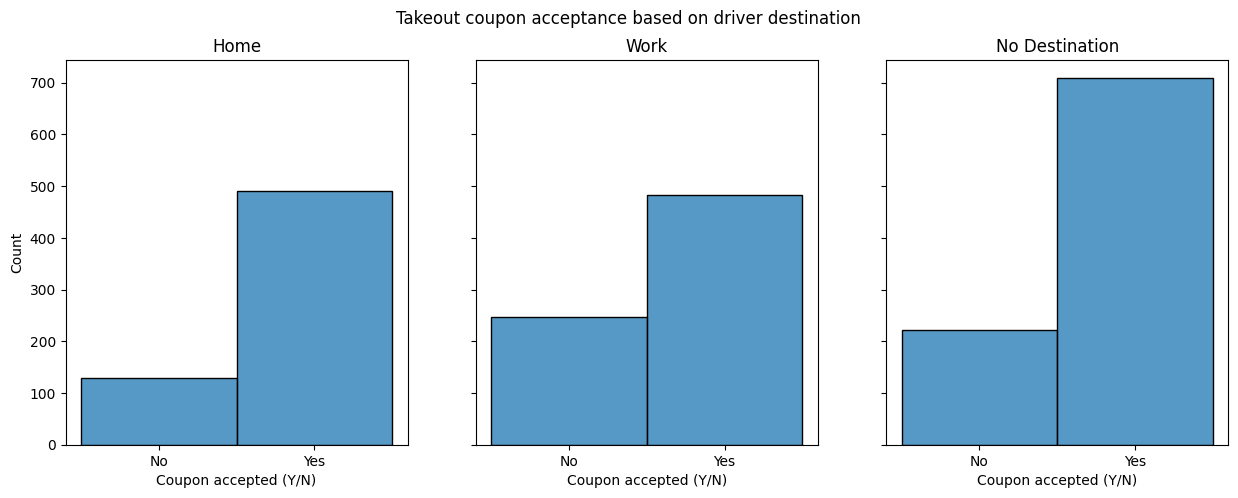

In [153]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
fig.suptitle('Takeout coupon acceptance based on driver destination')

sns.histplot(ax=axes[0], data=dest_home, x="Y_cat")
axes[0].set_title("Home")
axes[0].set_xlabel("Coupon accepted (Y/N)")

sns.histplot(ax=axes[1], data=dest_work, x="Y_cat")
axes[1].set_title("Work")
axes[1].set_xlabel("Coupon accepted (Y/N)")

sns.histplot(ax=axes[2], data=dest_none, x="Y_cat")
axes[2].set_title("No Destination")
axes[2].set_xlabel("Coupon accepted (Y/N)")

plt.show()


In [156]:
# Again, let's get some specific numbers here for Home, Work, and No Urgent Place
acc_rate(takeout[takeout['destination'] == "Home"]), acc_rate(takeout[takeout['destination'] == "Work"]), acc_rate(takeout[takeout['destination'] == "No Urgent Place"])

(0.7919354838709678, 0.6611796982167353, 0.761546723952739)

From this, we can conclude that drivers going home, or drivers without a particular destination are much more likely to accept a takeout coupon compared to drivers going to work. This could be a useful finding for a company--they could optimize their coupon distribution by avoiding sending coupons to users who are headed to work.

Now, I want to look at the effect of time of day on takeout coupon acceptance. My hypothesis is that drivers might be more likely to accept takeout coupons in the evening, or possibly in the late morning (near lunch).

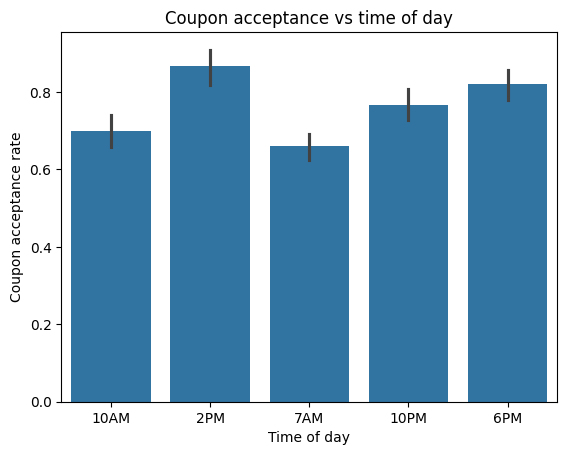

In [138]:
fig = sns.barplot(data=takeout, x="time", y="Y")
fig.set_title("Coupon acceptance vs time of day")
fig.set_xlabel("Time of day")
fig.set_ylabel("Coupon acceptance rate")
plt.show()

This shows us that coupons are more likely to be accepted at 2 PM and 6 PM, and least likely to be accepted at 7 AM.

Since this barplot only shows us the % of accepted coupons (and not the total volume of coupons offered), I've also constructed a stacked histogram below to visualize the same data:

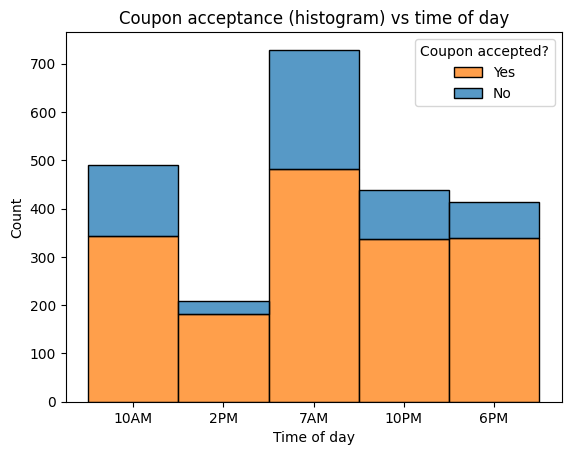

In [145]:
fig = sns.histplot(data=takeout, x="time", hue="Y_cat", multiple="stack")
fig.set_title("Coupon acceptance (histogram) vs time of day")
fig.set_xlabel("Time of day")
plt.legend(title="Coupon accepted?", labels=["Yes", "No"])
plt.show()

The histogram adds some interesting context. The 2 PM coupons were the most likely to be accepted, but 2 PM was also the least common time to receive a coupon by far. Unclear if there's a reason for this pattern in the survey data, but if a company wanted to implement time-based coupon assignments, they might want to consider prioritizing sending more coupons around 2 PM.

In [159]:
# Let's also find the specific acceptance rate numbers for all times of day
for t in takeout['time'].unique():
  print(f"Acceptance rate for {t}: {acc_rate(takeout[takeout['time'] == t])}")


Acceptance rate for 10AM: 0.7
Acceptance rate for 2PM: 0.8660287081339713
Acceptance rate for 7AM: 0.6611796982167353
Acceptance rate for 10PM: 0.7676537585421412
Acceptance rate for 6PM: 0.8208232445520581


Final takeaways from analyzing takeout coupons (also covered in the README):

* Time of day is fairly important--coupons sent around 2 PM and 6 PM were more likely to be accepted than other coupons, and coupons sent around 7 AM were the least likely to be accepted.
* Driver destination is also important. Drivers who are headed to work when they receive a coupon are much less likely to accept the coupon than drivers who have no destination in mind, or drivers who are going home.
* It is relatively unimportant whether the restaurant is in the same direction as the driver's main destination, or the opposite direction.